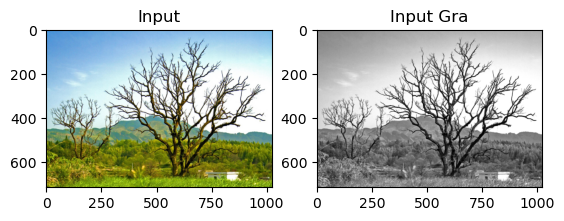

In [1]:
import cv2
import math
import numpy as np
from strokes_funct import edge_funct, strokes_funct
from matplotlib import pyplot as plt
from skimage import filters, transform
from scipy import signal

from skimage import data, img_as_float
from skimage import exposure
cv2.saliency

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


##input
image = cv2.imread('inputs/5--32.jpg')
scale_percent = 100 # percent of original size
height = int(image.shape[0] * scale_percent / 100)
width = int(image.shape[1] * scale_percent / 100)

dim = (width, height)

image= cv2.resize(image, dim) #redimensionar
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) ##grises

gray=gray.astype(float)
gray=filters.gaussian(gray,0.2, truncate=2)

ax1=plt.subplot(221)
ax1.imshow(image,cmap='gray')
ax1.set_title('Input')
ax2=plt.subplot(222)
ax2.imshow(gray,cmap='gray')
ax2.set_title('Input Gra')
plt.show()

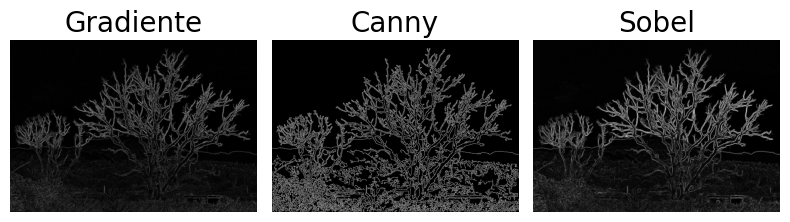

In [2]:
##Bordes
####0=gradiente, 1=canny, 2=sobel
edges=edge_funct(gray,method=0, display=True)


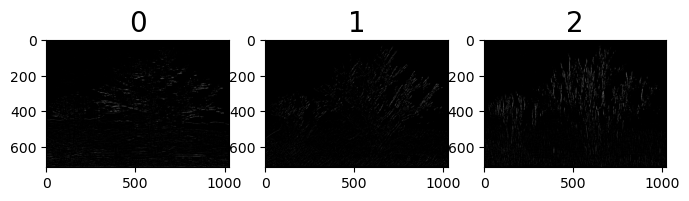

In [3]:
##STROKE 
LS= 15#int(height*(1/30))
strokes=strokes_funct(edges, lineSize=LS, display=True)


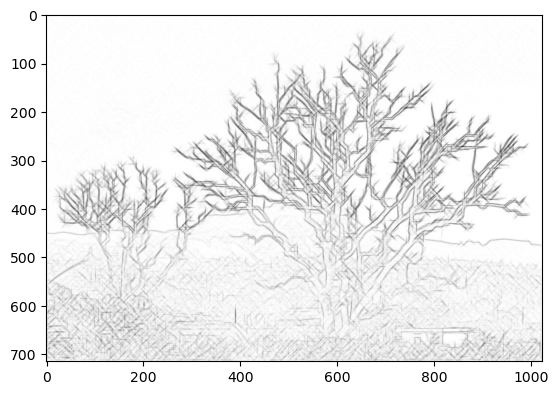

In [4]:
plt.imshow(strokes, cmap='gray')
plt.show()

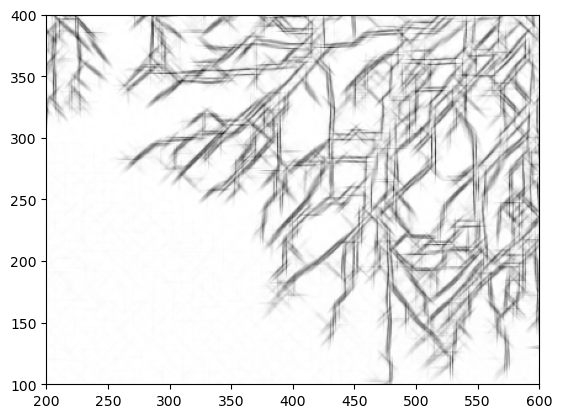

In [5]:
plt.imshow(strokes, cmap='gray') 
plt.xlim(200, 600)
plt.ylim(100,400)
plt.show()

In [6]:
edgesC=edge_funct(gray,method=1)
strokesC=strokes_funct(edgesC, lineSize=LS)
edgesS=edge_funct(gray,method=2)
strokesS=strokes_funct(edgesS, lineSize=LS)

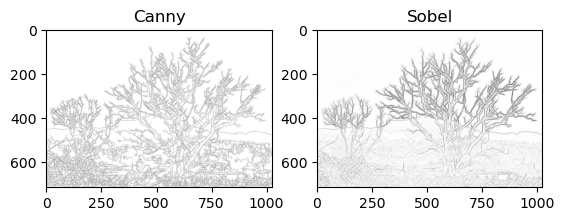

In [7]:
ax1=plt.subplot(221)
ax1.imshow(strokesC,cmap='gray')
ax1.set_title('Canny')
ax2=plt.subplot(222)
ax2.imshow(strokesS,cmap='gray')
ax2.set_title('Sobel')
plt.show()

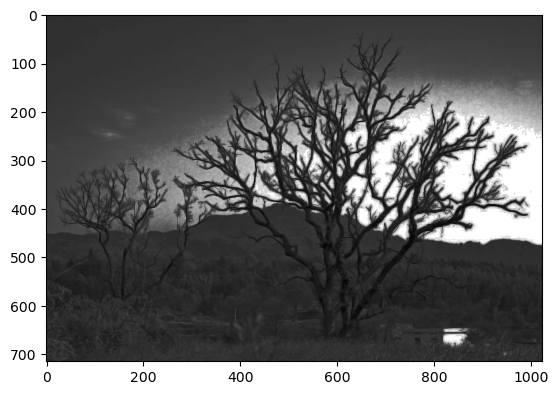

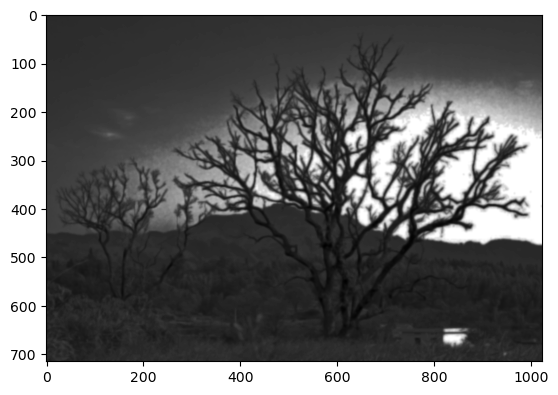

In [8]:

##TONE MAP
#####Parametros aprendidos paper
w1, w2, w3=11, 37, 52
desv_b=9
u_a=105
u_b=225
media_d=90
desv_d=11
lap_peak=255
p = np.zeros(256)
Z=0
for i in range(256):
    if i <= lap_peak:
        p1 = w1 * (1 / desv_b) * np.exp(-(255 - i) / desv_b)
    else:
        p1=0

    if (u_a <= i <= u_b):
        p2 = w2* 1 / (u_b - u_a)
    else:
        p2 = 0

    p3 = w3* (1/np.sqrt(2*math.pi*desv_d))*(np.exp(-(i-media_d)**2/(2*desv_d**2)))
    p[i] = (p1 + p2 + p3)*0.01
    Z=Z+p[i]

p=p/Z
gray=gray/255

P = np.cumsum(p)
#Equalize
# histograma original:
h = exposure.histogram(gray, nbins=256)
# CDF :
H = np.cumsum(h / np.sum(h))

# Histogram matching:
matched = np.zeros_like(p)
for v in range(256):
    # find the closest value:
    dist = np.abs(P - H[v])
    argmin_dist = np.argmin(dist)##indice del  minimo
    matched[v] = argmin_dist
matched= matched / 256

J = matched[(255 * gray).astype(int)]
# smooth:
J_b = filters.gaussian(J, sigma=np.sqrt(2))

plt.imshow(J, cmap='gray')
plt.show()
plt.imshow(J_b, cmap='gray')
plt.show()

#multi = True if P.shape[-1] > 1 else False
#matched = exposure.match_histograms(gray, p)


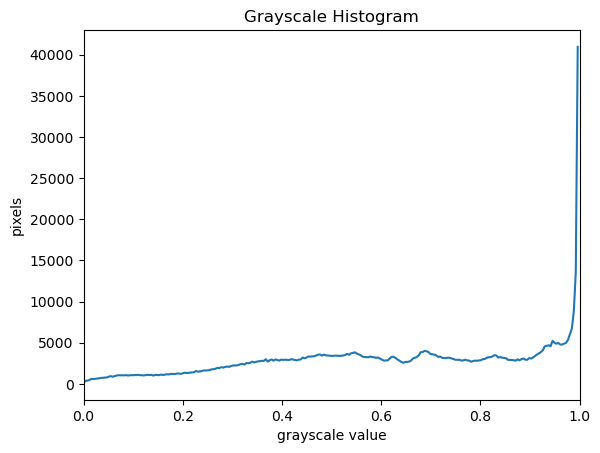

In [9]:
histogram, bin_edges = np.histogram(gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


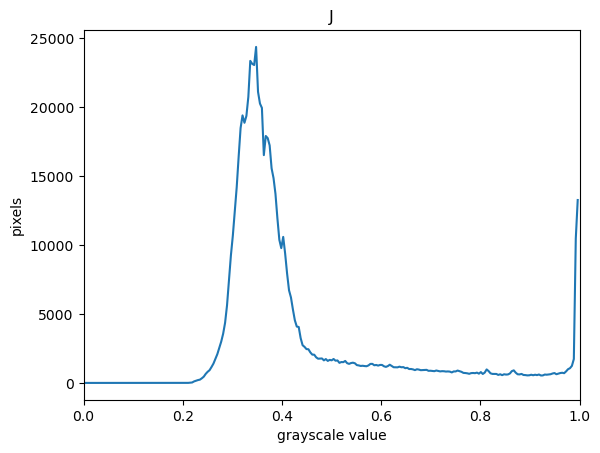

In [10]:
histogram, bin_edges = np.histogram(J_b, bins=256, range=(0, 1))
plt.figure()
plt.title("J")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


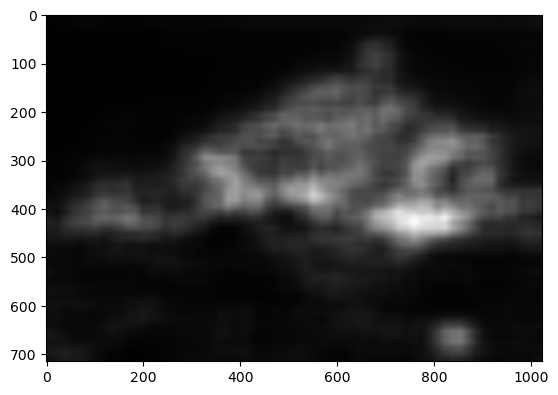

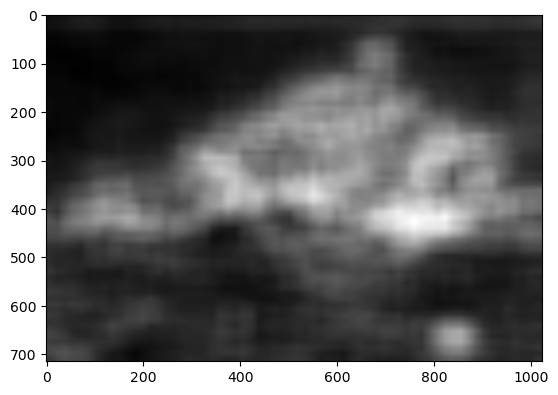

-1

In [11]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
#saliencyMap = (saliencyMap * 255).astype("uint8")
saliencyMap2=np.sqrt(saliencyMap)
saliencyMap2=filters.gaussian(saliencyMap2,0.2, truncate=2)
plt.imshow(saliencyMap, cmap='gray')
plt.show()
plt.imshow(saliencyMap2, cmap='gray')
plt.show()
cv2.waitKey(0)